<a href="https://colab.research.google.com/github/ritabandutta13/CE888/blob/main/Lab_4/my_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv", header=None)

In [ ]:
df = df[np.arange(1,101,1)].replace(99.00,np.nan)
df.columns = df.columns-1
df

0     1     2     3     4     5   ...    94    95    96    97    98    99
0     -7.82  8.79 -9.66 -8.16 -7.52 -8.50  ...   NaN   NaN -5.63   NaN   NaN   NaN
1      4.08 -0.29  6.36  4.37 -2.38 -9.66  ... -0.19 -2.14  3.06  0.34 -4.32  1.07
2       NaN   NaN   NaN   NaN  9.03  9.27  ...   NaN   NaN   NaN   NaN   NaN   NaN
3       NaN  8.35   NaN   NaN  1.80  8.16  ...   NaN   NaN   NaN   NaN   NaN   NaN
4      8.50  4.61 -4.17 -5.39  1.36  1.60  ...  5.73  1.55  3.11  6.55  1.80  1.60
...     ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
24978  0.44  7.43  9.08  2.33  3.20  6.75  ...  8.45  9.03  6.55  8.69  8.79  7.43
24979  9.13 -8.16  8.59  9.08  0.87 -8.93  ...  9.22 -8.20 -7.23 -8.59  9.13  8.45
24980   NaN   NaN   NaN   NaN -7.77   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
24981   NaN   NaN   NaN   NaN -9.71   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
24982  2.43  2.67 -3.98  4.27 -2.28  7.33  ...   NaN   NaN   NaN   NaN   NaN   NaN

[24983 rows x 100 columns]

In [ ]:
df.loc[2723,35]

-2.04

In [ ]:
max = -10
max_id = 0
min_id = 0
min = 10

for col in df.columns:
  mean = df[col].dropna().mean()
  if mean > max:
    max = mean
    max_id = col
  if mean < min:
    min = mean
    min_id = col

In [ ]:
print("Best Rated Joke and its avg rating : %i,%.2f , Worst Rated Joke and its avg rating : %i,%.2f"%(max_id,max,min_id,min))

Best Rated Joke and its avg rating : 49,3.67 , Worst Rated Joke and its avg rating : 57,-3.83


In [ ]:
def replace(df,p):
    df_new = df.copy() 
    arr = df.values
    rated = np.where(arr != np.nan)
    n_rated = len(rated[0])
    idx = np.random.choice(n_rated, size=int(p*n_rated), replace=False)
    df_new.loc[rated[0][idx], rated[1][idx]] = np.nan
    return df_new, (rated[0][idx], rated[1][idx])

In [ ]:
df_train, val_idx = replace(df,0.1)

In [ ]:
df_train

0   1   2   3   4   5   6   7   8   ...  91  92  93  94  95  96  97  98  99
0     NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN
1     NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN
2     NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN
3     NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN
4     NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..
24978 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN
24979 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN
24980 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN
24981 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN
24982 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN

[24983 rows x 100 columns]

In [ ]:
n_latent_factors = 2
user_ratings = df.values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [ ]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

Iteration 0/100:	MSE=26.201582
Iteration 10/100:	MSE=23.008329
Iteration 20/100:	MSE=20.290359
Iteration 30/100:	MSE=17.684806
Iteration 40/100:	MSE=17.266663
Iteration 50/100:	MSE=17.174076
Iteration 60/100:	MSE=17.145631
Iteration 70/100:	MSE=17.136248
Iteration 80/100:	MSE=17.133236
Iteration 90/100:	MSE=17.132487


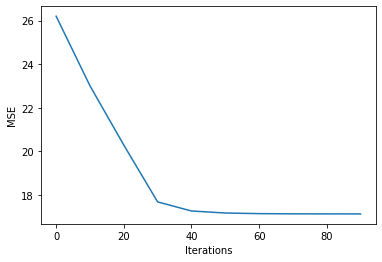

In [ ]:
num_iter = 100
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 10), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [ ]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[-3.90657162, -4.16294675, -5.63133832, ..., -2.46434245,
        -6.22152146, -2.59655029],
       [ 2.98089436,  3.14263396,  3.78321203, ...,  2.51110042,
         3.96289479,  2.75909337],
       [ 6.88661174,  7.17744029,  7.48435867, ...,  7.34290707,
         7.23789662,  8.27542699],
       ...,
       [-1.06025897, -1.12490023, -1.45347168, ..., -0.76077478,
        -1.57419374, -0.81810254],
       [-1.96889218, -2.10503132, -2.94319321, ..., -1.11308377,
        -3.29597217, -1.14964179],
       [ 2.79089001,  2.87523177,  2.5249267 , ...,  3.59968897,
         2.15731472,  4.12312776]])

In [ ]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_df_train = pd.DataFrame(values)
comparison_df_train.columns = df_train.columns

In [ ]:
comparison_df_train

0   ...                          99
0      (-7.82, -3.9065716152869667)  ...  (nan, -2.5965502907375457)
1        (4.08, 2.9808943582416165)  ...   (1.07, 2.759093366527102)
2         (nan, 6.8866117435794045)  ...    (nan, 8.275426988858825)
3          (nan, 1.915794538649564)  ...   (nan, 2.9070611522008396)
4         (8.5, 2.9157673457251403)  ...   (1.6, 4.3390541701705745)
...                             ...  ...                         ...
24978    (0.44, 2.3174935644966808)  ...   (7.43, 3.901909244377797)
24979    (9.13, 2.3690397611976386)  ...   (8.45, 1.546842732540062)
24980    (nan, -1.0602589692722528)  ...  (nan, -0.8181025430848032)
24981    (nan, -1.9688921801746848)  ...  (nan, -1.1496417855922765)
24982    (2.43, 2.7908900061319657)  ...     (nan, 4.12312776409253)

[24983 rows x 100 columns]

In [ ]:
dm = pd.read_excel("/content/drive/MyDrive/movies_latent_factors.xlsx")
dm

Movie ID  ...  Factor15
0         11  ... -0.248806
1         12  ...  1.274993
2         13  ... -0.419092
3         14  ... -0.681191
4         22  ... -2.292566
..       ...  ...       ...
95      9806  ...  1.017861
96     10020  ... -0.487076
97     36657  ...  0.067790
98     36658  ... -0.288130
99     36955  ... -0.022599

[100 rows x 17 columns]

In [ ]:
du = pd.read_excel("/content/drive/MyDrive/movies_latent_factors.xlsx",sheet_name=1)
du

User   Factor1   Factor2   Factor3  ...  Factor12  Factor13  Factor14  Factor15
0   4768 -0.204024  0.161079 -0.090447  ...  0.355404  0.007108 -0.118663 -0.039125
1    156 -0.189652 -0.178979 -0.091490  ... -0.048606  0.045916  0.113671  0.179873
2   5323 -0.115308 -0.090886 -0.053129  ... -0.019460  0.108372  0.054471 -0.109552
3    174 -0.227462 -0.272532 -0.017231  ... -0.082396  0.036767 -0.165438  0.050692
4   4529 -0.014616 -0.102218 -0.107935  ... -0.132836 -0.039897  0.129063  0.102669
5    783 -0.020301 -0.031919 -0.036955  ...  0.059725 -0.021647  0.039873 -0.061857
6   3878 -0.091462  0.215879 -0.180453  ...  0.214467  0.189250  0.065990  0.102776
7    768  0.000819 -0.009229 -0.019228  ... -0.010051 -0.002108  0.043223 -0.006670
8   4469 -0.030528 -0.011537 -0.042822  ...  0.010926  0.024400  0.005318 -0.007983
9   1882 -0.083093 -0.029160  0.013748  ... -0.113364 -0.021325  0.181508  0.022357
10  4997 -0.185443 -0.276496 -0.781275  ...  0.103116 -0.100563  0.100164  0.043196
11  2067 -0.083242  0.181171 -0.344267  ... -0.127038  0.176661 -0.055812 -0.000042
12  3806 -0.042344 -0.040755 -0.055720  ... -0.040915 -0.130308 -0.021816  0.034549
13  2848 -0.113283 -0.098942 -0.040393  ...  0.036894  0.067105 -0.016780 -0.029503
14  4433 -0.298760 -0.290228 -0.160120  ...  0.071371 -0.415598 -0.022139 -0.183021
15  3519 -0.068454  0.020090  0.039336  ...  0.005171  0.005546  0.020780 -0.023623
16  5338 -0.061259  0.014661  0.011412  ...  0.031774 -0.062413  0.107708  0.065081
17  3947 -0.022340 -0.115285 -0.136980  ... -0.045329 -0.111919  0.066313  0.002395
18  4373 -0.136550 -0.089406 -0.235399  ... -0.028972 -0.175184 -0.058283  0.147797
19  2092 -0.121763  0.011065 -0.037121  ...  0.044754 -0.003087  0.164487 -0.075231
20   525 -0.040290  0.014383 -0.098967  ... -0.025394  0.034079  0.038330 -0.001341
21  4327  0.008227  0.073899 -0.323967  ... -0.106570 -0.051692 -0.093490  0.029534
22  3048 -0.320315  0.078290 -0.083182  ...  0.028016 -0.018100 -0.128452  0.069972
23  2665 -0.076167 -0.006064 -0.001902  ...  0.086562 -0.132328  0.146198  0.029200
24  4940 -0.113099  0.047643 -0.053024  ...  0.010227 -0.008233 -0.029304  0.090511

[25 rows x 16 columns]

In [ ]:
dm[dm["Movie ID"] == 671]["Factor5"]

57    0.536773
Name: Factor5, dtype: float64

In [ ]:
dm[dm["Factor2"] == dm["Factor2"].min()]

Movie ID  ...  Factor15
16       122  ... -0.314937

[1 rows x 17 columns]

In [ ]:
np.array(du[du["User"] == 783].drop("User", axis = 1)).shape

(1, 15)

In [ ]:
def m_predict(uid,mid):
  return np.squeeze(np.array(du[du["User"] == uid].drop("User", axis = 1)).dot(np.array(dm[dm["Movie ID"] == mid].drop(["Movie ID","Title"], axis = 1)).T))

In [ ]:
m_predict(783,558)

array(-0.12246388)

In [ ]:
m_predict(3806,558)

array(-0.56242976)

In [ ]:
def topn(uid, n): 
  rat = []
  for id in dm["Movie ID"].values:
    pred = m_predict(uid,id).item()
    rat.append((id,pred))
  rat.sort(key=lambda x:x[1], reverse=True)
  return rat[0:n]

In [ ]:
topn(3806, 2)

[(603, 0.8928390521025773), (854, 0.872107216953862)]

In [ ]:
topn(156, 3)

[(603, 1.0522554619985223),
 (1891, 0.9102336968038713),
 (1892, 0.8852081243380692)]